In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
G=6.67e-11 #N m^2 kg^-2
UA=1.4959e11 #m
MT=5.97e24 #kg
RT=6351000 #m
def f(rho,rho0):
    f=0.5*((rho/rho0)**(2/3)-1)
    return f

In [ ]:
#Propiedades rho0, gamma0, K0, q del manto:
rho0M=3560 #kg m^-3
K0M=184e9 #Pa
qM=1
gamma0M=2.9
#Función con las tazas de cambio:
def perfilM(X,r):
    rho=X[0]
    g=X[1]
    m=X[2]
    P=X[3]
    T=X[4]
    drhodr = -(rho0M*rho*g)/(K0M*(1+9*f(rho,rho0M)+12*(f(rho,rho0M))**2))
    dgdr = (4*np.pi*G*rho) - ((2*G*m)/(r**3))
    dmdr = 4*np.pi*(r**2)*rho
    dPdr = -rho*g
    dTdr = -((rho0M*gamma0M*T*g)/(K0M*(1+9*f(rho,rho0M)+12*(f(rho,rho0M))**2))) * (rho0M/rho)**qM
    return (drhodr,dgdr,dmdr,dPdr,dTdr)

In [ ]:
#Cond Frontera:
#Manto:
rhoiM=3000. #kg m^-3
giM=G*MT/RT**2
MiM=MT
PiM=1.013e5 #Pa
TiM=300. #K

X0M=[rhoiM,giM,MiM,PiM,TiM]

rManto=np.linspace(6351000,3466000,3000)
from scipy.integrate import odeint
Manto = odeint(perfilM,X0M,rManto)
X0NE=[Manto[:,0][-1],Manto[:,1][-1],Manto[:,2][-1],Manto[:,3][-1],Manto[:,4][-1]]

In [ ]:
#Propiedades rho0, gamma0, K0, q del núcleo ext:
rho0NE=6800 #kg m^-3
K0NE=136e9 #Pa
qNE=1
gamma0NE=2.5
#Función con las tazas de cambio:
def perfilNE(X,r):
    rho=X[0]
    g=X[1]
    m=X[2]
    P=X[3]
    T=X[4]
    drhodr = -(rho0NE*rho*g)/(K0NE*(1+9*f(rho,rho0NE)+12*(f(rho,rho0NE))**2))
    dgdr = (4*np.pi*G*rho) - ((2*G*m)/(r**3))
    dmdr = 4*np.pi*(r**2)*rho
    dPdr = -rho*g
    dTdr = -((rho0NE*gamma0NE*T*g)/(K0NE*(1+9*f(rho,rho0NE)+12*(f(rho,rho0NE))**2))) * (rho0NE/rho)**qNE
    return (drhodr,dgdr,dmdr,dPdr,dTdr)


In [ ]:
rNucleoE=np.linspace(3466000,1200000,2500)
NucleoE=odeint(perfilNE,X0NE,rNucleoE)
X0NI=[NucleoE[:,0][-1],NucleoE[:,1][-1],NucleoE[:,2][-1],NucleoE[:,3][-1],NucleoE[:,4][-1]]

In [ ]:
#Propiedades rho0, gamma0, K0, q del núcleo int:
rho0NI=8051 #kg m^-3
K0NI=217e9 #Pa
qNI=0.91
gamma0NI=2.06
#Función con las tazas de cambio:
def perfilNI(X,r):
    rho=X[0]
    g=X[1]
    m=X[2]
    P=X[3]
    T=X[4]
    drhodr = -(rho0NI*rho*g)/(K0NI*(1+9*f(rho,rho0NI)+12*(f(rho,rho0NI))**2))
    dgdr = (4*np.pi*G*rho) - ((2*G*m)/(r**3))
    dmdr = 4*np.pi*(r**2)*rho
    dPdr = -rho*g
    dTdr = -((rho0NI*gamma0NI*T*g)/(K0NI*(1+9*f(rho,rho0NI)+12*(f(rho,rho0NI))**2))) * (rho0NI/rho)**qNI
    return (drhodr,dgdr,dmdr,dPdr,dTdr)

In [ ]:
rNucleoI=np.linspace(1200000,10000,1200)
NucleoI=odeint(perfilNI,X0NI,rNucleoI)

## Gráficas:

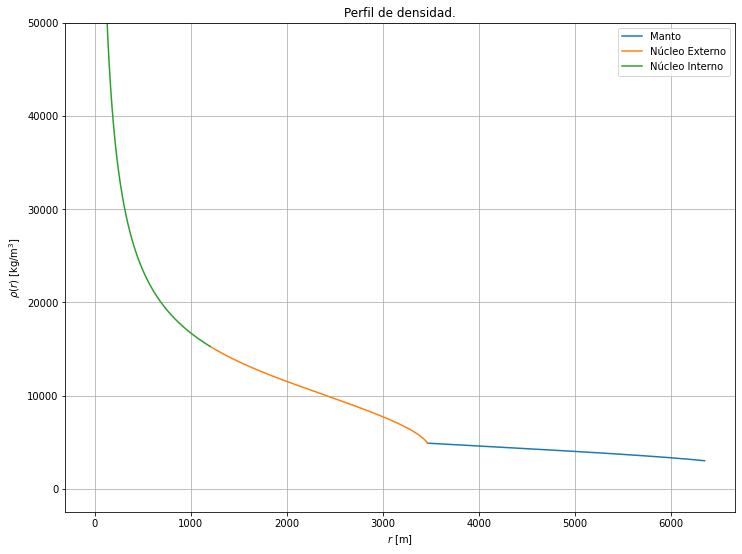

In [ ]:
#Densidad

plt.figure(figsize=(12,9))
plt.title("Perfil de densidad.")
plt.plot(rManto/1000,Manto[:,0],label='Manto')
plt.plot(rNucleoE/1000,NucleoE[:,0],label='Núcleo Externo')
plt.plot(rNucleoI/1000,NucleoI[:,0],label='Núcleo Interno')
plt.ylim((-2500,50000))
plt.ylabel(r'$\rho(r)$ [kg/m$^3$]')
plt.xlabel(r'$r$ [m]')
plt.legend()
plt.grid()

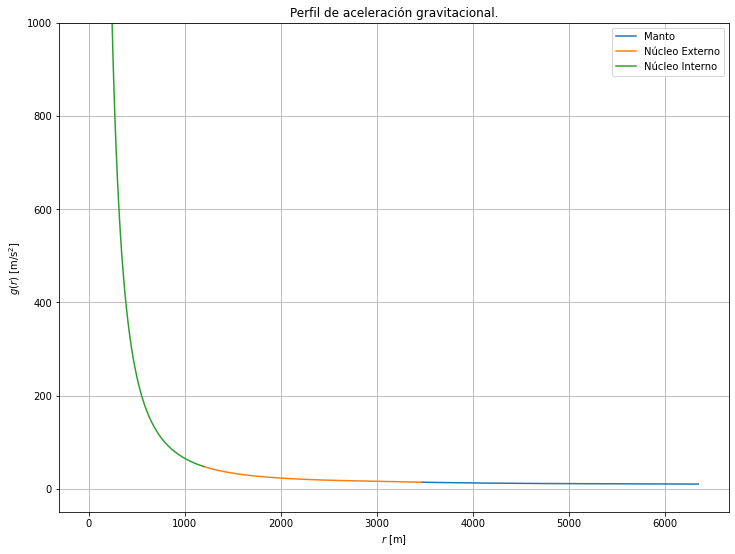

In [ ]:
#Aceleración g

plt.figure(figsize=(12,9))
plt.title("Perfil de aceleración gravitacional.")
plt.plot(rManto/1000,Manto[:,1],label='Manto')
plt.plot(rNucleoE/1000,NucleoE[:,1],label='Núcleo Externo')
plt.plot(rNucleoI/1000,NucleoI[:,1],label='Núcleo Interno')
plt.ylim((-50,1000))
plt.ylabel(r'$g(r)$ [m/s$^2$]')
plt.xlabel(r'$r$ [m]')
plt.legend()
plt.grid()

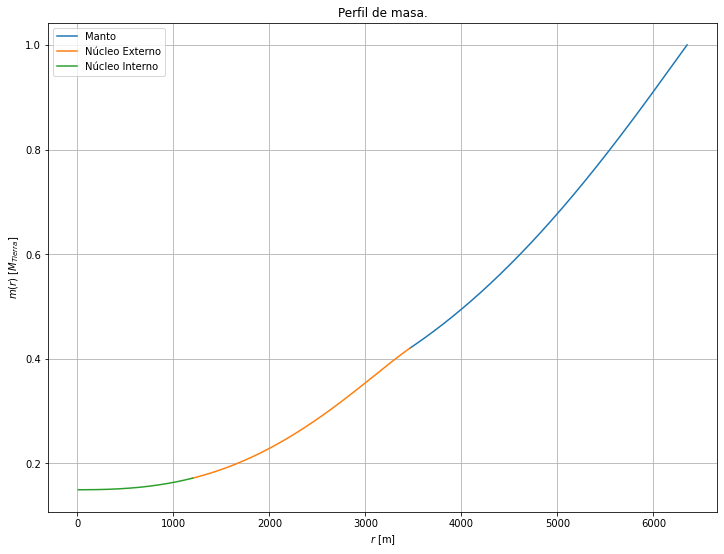

In [ ]:
#Masa

plt.figure(figsize=(12,9))
plt.title("Perfil de masa.")
plt.plot(rManto/1000,Manto[:,2]/MT,label='Manto')
plt.plot(rNucleoE/1000, NucleoE[:,2]/MT,label='Núcleo Externo')
plt.plot(rNucleoI/1000,NucleoI[:,2]/MT,label='Núcleo Interno')
plt.ylabel(r'$m(r)$ [$M_{Tierra}$]')
plt.xlabel(r'$r$ [m]')
plt.legend()
plt.grid()

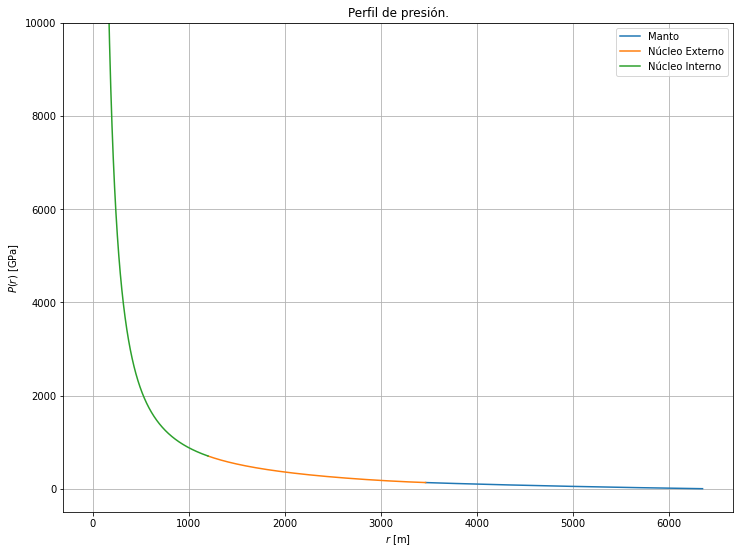

In [ ]:
#Presión

plt.figure(figsize=(12,9))
plt.title("Perfil de presión.")
plt.plot(rManto/1000, Manto[:,3]/1e9,label='Manto')
plt.plot(rNucleoE/1000, NucleoE[:,3]/1e9,label='Núcleo Externo')
plt.plot(rNucleoI/1000, NucleoI[:,3]/1e9,label='Núcleo Interno')
plt.ylim((-500,10000))
plt.ylabel(r'$P(r)$ [GPa]')
plt.xlabel(r'$r$ [m]')
plt.legend()
plt.grid()

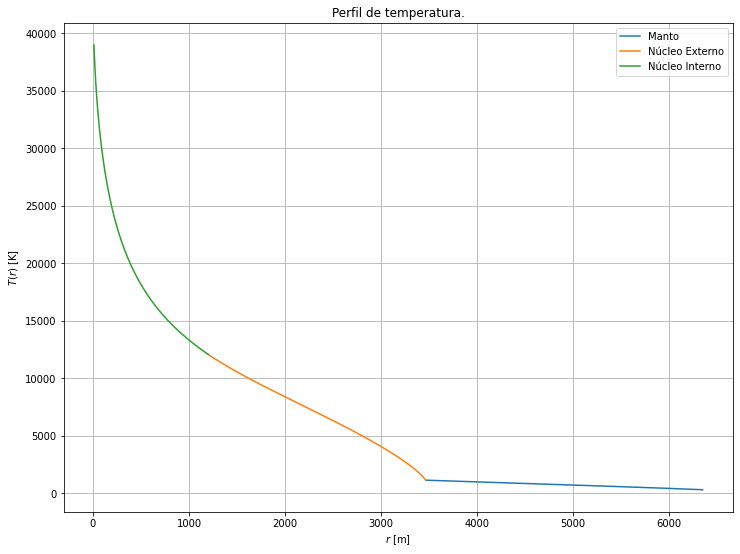

In [ ]:
#Temperatura

plt.figure(figsize=(12,9))
plt.title("Perfil de temperatura.")
plt.plot(rManto/1000, Manto[:,4],label='Manto')
plt.plot(rNucleoE/1000, NucleoE[:,4],label='Núcleo Externo')
plt.plot(rNucleoI/1000, NucleoI[:,4],label='Núcleo Interno')
plt.ylabel(r'$T(r)$ [K]')
plt.xlabel(r'$r$ [m]')
plt.legend()
plt.grid()